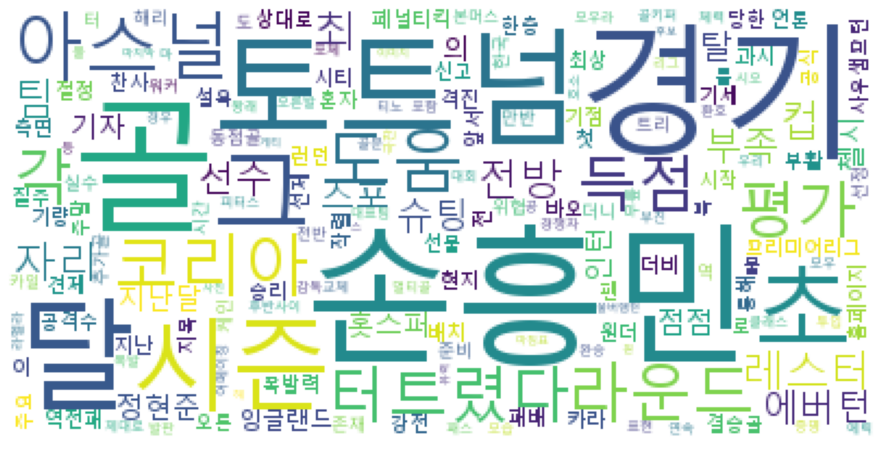

In [27]:
# 텍스트 마이닝, 크롤링
import requests # urllib를 wrapper해서 사용하기 편하게 만든 패키지
import nltk
from konlpy.tag import Twitter
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
res = requests.get('http://sports.v.daum.net/v/20181227140914322')
soup = BeautifulSoup(res.content, 'html.parser') # 브라우저처럼 파싱후 계층적으로 표현
body = soup.select('.article_view')[0] # class css3

# 태그의 역할은 정보의 표현
text = " ".join(p.get_text() for p in body.find_all('p')) # 태그가 표현하고자 하는 문자
t = Twitter()
tokens_ko = t.nouns(text) # 명사만 추출(extraction)
ko = nltk.Text(tokens_ko, name = '스포츠') # text mining하는 도구 # 챗봇 도구도 지원
ko.vocab().most_common(10) # 가장 빈번하게 사용하는 단어 10개 선별
data = ko.vocab().most_common(500) 
tmp_data = dict(data) 

# 딕셔너리 형태로 데이터가 입력
# 도수를 이용해서 워드 클라우드를 생성
# stopwords : 원하지 않는 단어 제거
# nltk, gensim이 기본
wordcloud = WordCloud(font_path='c://windows/Fonts/malgun.ttf', 
                      relative_scaling=0.1, background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

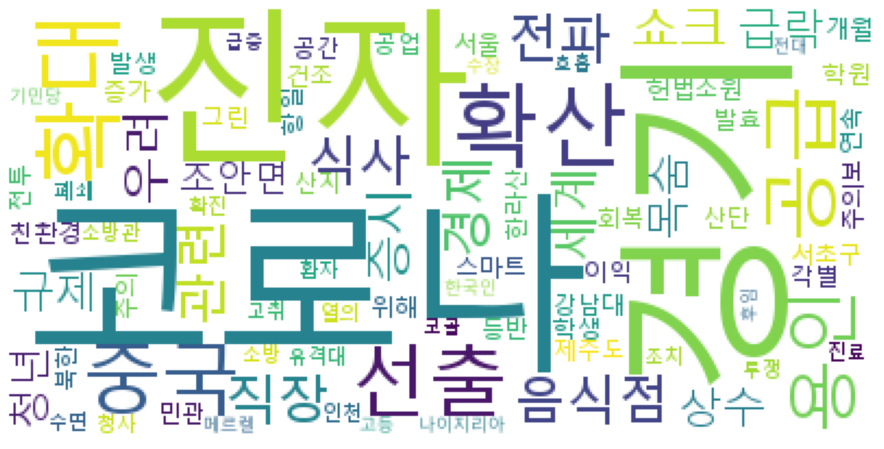

In [72]:
"""
최근 기사를 검색후 원하는 주제에 대하여 파싱후 wordcloud로 표현해보시오
"""

import requests 
import nltk
from konlpy.tag import Twitter
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
res = requests.get('https://news.daum.net/')
soup = BeautifulSoup(res.content, 'html.parser') 
body = soup.select('.box_headline')[0] 



text = " ".join(p.get_text() for p in body.find_all('a')) 
t = Twitter()
tokens_ko = t.nouns(text) 
ko = nltk.Text(tokens_ko, name = '스포츠') 
data1 = ko.vocab().most_common(100) 
data2 = ko.vocab().most_common(500) 



stopwords = ['테스트']

# for each_word in data1:
#     if len(each_word[0]) > 1:
#         print(each_word)

tokens = [each_word for each_word in data1 if len(each_word[0]) > 1] # 결과물 each_word

# print(data1)
# print(tokens)

tmp_data = dict(tokens) 



wordcloud = WordCloud(font_path='c://windows/Fonts/malgun.ttf', 
                      relative_scaling=0.1, background_color='white').generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [77]:
from time import time

# text 전처리
# DTM-> Document-term matrix -> 문서 빈도 행렬
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # 빈도수를 확인
from sklearn.decomposition import LatentDirichletAllocation # 주제에 나타날 단어 확률

# 주제2개 : 확률이 높은 곳으로 분류 - 빈도수와 근접한 단어
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def print_top_words(model, feature_names, n_top_words):
    # LDA에서 주제에 해당하는 단어
    for topic_idx, topic in enumerate(model.components_): # 특징 추출시 ( PCA )
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words -1:-1]])
        print(message)
    print()
    
# 기사의 본문만 다운하는 코드
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

data_samples = dataset.data[:n_samples] # 각 주제의 단어 2000개 까지 추출

"""
문제 : inverse document frequency 변경해서 topic analysis를 진행하시오
"""
#문제시작
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_samples)
#문제끝

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english') # 내부적으로 stopwords제거
#df : document frequency
tf = tf_vectorizer.fit_transform(data_samples)  # 1000개의 단어로 이루어진 DTM

# PCA는 주성분, LDA는 text에서 특징 추출
# n_components = 10 주제어 10개 
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', 
                                learning_offset=50, random_state=0)

lda.fit(tf) # 빈도수와 근접단어를 이용해서 topic 분석을 실행
tf_feature_names = tf_vectorizer.get_feature_names() # 단어
print_top_words(lda, tf_feature_names, n_top_words)


Topic #0: edu com mail send graphics ftp pub available contact university list faq ca information cs 1993 program sun uk mit
Topic #1: don like just know think ve way use right good going make sure ll point got need really time doesn
Topic #2: christian think atheism faith pittsburgh new bible radio games alt lot just religion like book read play time subject believe
Topic #3: drive disk windows thanks use card drives hard version pc software file using scsi help does new dos controller 16
Topic #4: hiv health aids disease april medical care research 1993 light information study national service test led 10 page new drug
Topic #5: god people does just good don jesus say israel way life know true fact time law want believe make think
Topic #6: 55 10 11 18 15 team game 19 period play 23 12 13 flyers 20 25 22 17 24 16
Topic #7: car year just cars new engine like bike good oil insurance better tires 000 thing speed model brake driving performance
Topic #8: people said did just didn know ti

In [78]:
# AE
import tensorflow as tf
import numpy.random as rnd
import numpy as np
rnd.seed(4)
m=200
w1, w2 = 0.1, 0.3
noise = 0.1
angles = rnd.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))

#3차원 데이터 생성 전체데이터 200
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * rnd.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * rnd.randn(m) / 2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * rnd.randn(m)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100]) # 100개
X_test = scaler.transform(data[:100]) # 100개

C:\Users\2-18\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


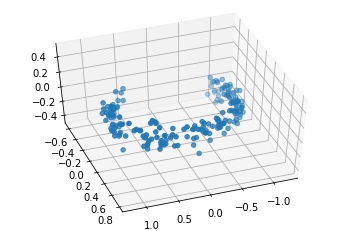

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
ax.view_init(azim=70, elev=50)

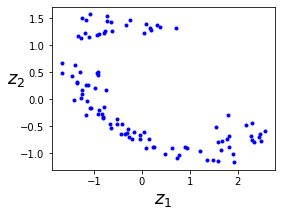

In [93]:
# 3차원 -> 2차원으로 변환 ( 차원축소 ) : AE를 통해

import tensorflow as tf
tf.reset_default_graph()
n_inputs = 3 # 3차원
n_hidden = 2 # 2차원으로 차원축소
n_outputs = n_inputs # 입력과 출력 사이즈 동일
learning_rate = 0.01
X = tf.placeholder(tf.float32, shape=[None, n_inputs]) # 100

# 가중치를 별도두고 학습 : 두가중치를 중복사용하면 더 빨리 학습 ( 가중치 전치 )
hidden = tf.layers.dense(X, n_hidden) #가중치계산후 초기화 #100x3 -> 3x2 -> 100x2 #결과가 특징
outputs = tf.layers.dense(hidden, n_outputs) # 100x2 -> 2x3 ->  100x3

# 재구축 : 확률에서 생성패턴을 이용
# 입력과 출력의 차가 최소화 되는 방향으로 학습
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X)) # cost function
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)
init = tf.global_variables_initializer()

n_iterations = 1000
codings = hidden # 차원축소한다 = 코딩한다 = encoding(차원축소), decoding(재구축)
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X:X_train})
    codings_val = codings.eval(feed_dict={X: X_test})
fig = plt.figure(figsize=(4, 3))

#차원축소 : 모양과 형태를 유지하면서 시각화가 가능하도록 학습
plt.plot(codings_val[:,0], codings_val[:,1], "b.") # 테스트 데이터 시각화
plt.xlabel('$z_1$', fontsize=18)
plt.ylabel('$z_2$', fontsize=18, rotation = 0)
plt.savefig('선형 AE')
plt.show()

In [104]:
""" 
mnist 사용 차원축소
-denoising model 학습
-대칭적 모델인 AE에서 차원축소 가중를 전치해서 생성모델의 가중치 중복사용

"""
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # 그리드 형태로 이미지 출력(여러장 )
def vis(images, save_name): 
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim))) # 가로 세로 사이즈를 비슷하게 하기 위해서
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows)) # 소수점올림
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g, count in zip(gs, range(int(dim))):
        ax = plt.subplot(g) # grid당 하나의 서브플롯이 생성
        ax.imshow(images[count,:].reshape((28, 28)))
        ax.set_xticks([])# 정보 무
        ax.set_yticks([])
    plt.savefig(save_name + '_vis.png')
    plt.show()

mnist_width = 28
n_visible = mnist_width * mnist_width # 784
n_hidden = 500 # 차원축소
corruption_level = 0.3
X = tf.placeholder("float", [None, n_visible], name='X') # 입력데이터
mask = tf.placeholder('float', [None, n_visible], name='mask')# 데이터중 일부를 가린다 ( random을 주겠다 = 노이즈추가)
W_init_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
W_init = tf.random_uniform(shape=[n_visible, n_hidden], minval=-W_init_max, maxval=W_init_max)

# mask로 입력되는 데이터는 binomial 분포( 이항분포 ) : 0/1
W = tf.Variable(W_init, name='W')
b = tf.Variable(tf.zeros([n_hidden]), name='b')

# PCA : 직교축 변환된 데이터 -> 직교축을 전치해서 -> 복원된 축
W_prime = tf.transpose(W) # 축소하는 가중치와 복원하는 가중치를 중복사용
b_prime = tf.Variable(tf.zeros([n_visible]), name='b_prime')
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X 
    # 요소곱 연산 ( 행렬곱 x ) : 위치에 있는 수끼리 곱 : 노이즈를 주어서 학습 : denoising(노이즈를 제거하는 특징)습득
    # 비선형 특징 추출 ( 선형=PCA)
    
    Y = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b) # 차원축소 : 차원축소된 결과
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime) # 생성확대
    return Z
Z = model(X, mask, W, b, W_prime, b_prime) # 원래의 이미지로 복원
cost = tf.reduce_sum(tf.pow(X - Z, 2)) # 비용함수 : 입력과 출력이 동일
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z
    

In [107]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX)+1, 128)):
            input_ = trX[start:end] # 변동적으로 훈련데이터 선택
            
            #이항분포 0, 1
            #노이즈 첨가 : 7할은 참(1) 3할은 거짓(0) : corruption_level = 3
            mask_np = np.random.binomial(1, 1 - corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X: input_, mask : mask_np})
        mask_np = np.random.binomial(1, 1 - corruption_level, teX.shape)
        print(i, sess.run(cost, feed_dict={X: teX, mask:mask_np}))
    mask_np = np.random.binomial(1, 1 - corruption_level, teX[:100].shape)
    predict_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask:mask_np})
    input_imgs = teX[:100]



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0 113351.37
1 98800.73
2 88095.305
3 81179.52
4 78651.37
5 77947.14
6 73716.2
7 74053.91
8 69928.5
9 69286.125
10 68583.4
11 67461.74
12 67304.19
13 67320.01
14 66087.586
15 65161.25
16 64427.47
17 63690.074
18 65331.566
19 63843.91
20 63178.84
21 63117.12
22 62710.23
23 62930.266
24 62835.32
25 62692.645
26 61932.918
27 62359.312
28 62185.145
29 61920.48
30 61232.746
31 61707.156
32 62230.69
33 60709.934
34 61269.074
35 61624.344
36 60791.56
37 60636.19
38 60246.766
39 60730.316
40 60627.027
41 59603.992
42 60422.137
43 60538.855
44 59217.543
45 60091.695
46 59955.695
47 59711.395
48 59826.754
49 59889.297
50 59616.44
51 59277.492
52 59810.734
53 59777.85
54 59297.555
55 59037.11
56 60277.44
57 59037.562
58 58418.15
59 59233.68
60 58111.64
61 58575.867
62 58126.93
63 58676.184
64 58710.027
65 5

In [ ]:
# 오전 종료 ===========================================================================================================================================================================================================

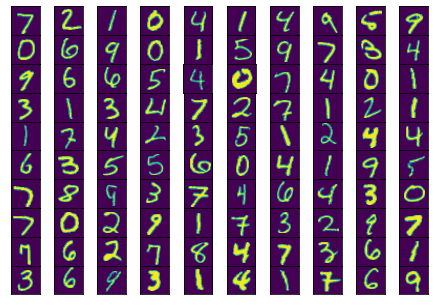

In [106]:
vis(input_imgs, 'in')

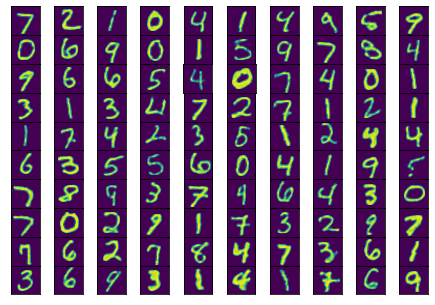

In [105]:
vis(predict_imgs, 'pred')

In [136]:
"""
문제
-지도학습, 비지도학습을 이용해서 mnist문제를 해결하시오
-비지도학습을 784개의 변수를 (300, 150, 50)개의 순으로 특징 추출하고 이의 결과를 이용해서 지도학습으로 분류모델을 생성하시오
"""

import sys
import tensorflow as tf
n_inputs = 28 * 28
n_hidden1 = 300 # 신경망에서 차수를 줄인다. 즉, 특징추출한다 => 행렬곱연산
n_hidden2 = 150
n_hidden3 = 50
n_outputs = 10

mnist = input_data.read_data_sets('MNIST_data/', one_hot=False)

learning_rate = 0.01
l2_reg = 0.0005 # 규제 : 과적합 방지

#relu 를 개선한 버전 ==> 0
activation = tf.nn.elu # ~인경우 지수형으로 변환해서 -를 고려 : relu보다 속도는 느리나 결과는 양호(elu)

# 규제 : lasso Ridge Elastic, SVM : C
regularizer = tf.contrib.layers.l2_regularizer(l2_reg)

# random_normal + scaling( 이론적으로 정규분포는 무한대까지 가능(-1 ~ 1) ) 
initializer = tf.contrib.layers.variance_scaling_initializer() # 가중치 초기화 함수 변경

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.int32, shape=[None])

# == 12line
weights1_init = initializer([n_inputs, n_hidden1])  # 784x300
weights2_init = initializer([n_hidden1, n_hidden2]) # 300x150
weights3_init = initializer([n_hidden2, n_hidden3]) # 150x50

weights1 = tf.Variable(weights1_init, dtype=tf.float32, name='weights1')
weights2 = tf.Variable(weights2_init, dtype=tf.float32, name='weights2')
weights3 = tf.Variable(weights3_init, dtype=tf.float32, name='weights3')

biases1 = tf.Variable(tf.zeros(n_hidden1), name='biases1')
biases2 = tf.Variable(tf.zeros(n_hidden2), name='biases2')
biases3 = tf.Variable(tf.zeros(n_hidden3), name='biases3')

#행렬곱 연산으로 차원축소
hidden1 = activation(tf.matmul(X, weights1) + biases1)
hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
logits_1 = tf.matmul(hidden2, weights3) + biases3 # 특징추출 784 => 50 (차원의 저주) 특징값이 추출된 50개이기때문에 더 낫다
# ==

# 위의 가중치와 바이어스를 dense함수를 이용해 수정하시오 (12줄을 3줄로)
# == 3line

hidden1 = tf.layers.dense(X, n_hidden1, activation=activation, kernel_initializer=initializer)
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=activation, kernel_initializer=initializer)
logits_1 = tf.layers.dense(hidden2, n_hidden3, activation=activation, kernel_initializer=initializer)

# ==
logits = tf.layers.dense(logits_1, n_outputs) # 지도학습으로 전환

cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)

# 가중치의 계수로 부터 구해지는 규제값
reg_loss = regularizer(weights1) + regularizer(weights2) + regularizer(weights3)
loss = cross_entropy + reg_loss
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)


correct = tf.nn.in_top_k(logits, y, 1) # equal까지 카운트
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver() # 모델을 저장
n_epochs = 4
batch_size = 150
n_labeled_instances = 20000


import numpy.random as rnd
#참여하는 이미지 장수
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches = n_labeled_instances // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches), end="")
            sys.stdout.flush()
            indices = rnd.permutation(n_labeled_instances)[:batch_size] # 섞은 이미지 150개만 선별
            X_batch, y_batch = mnist.train.images[indices], mnist.train.labels[indices]
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        accuracy_val = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        print("\r{}%".format(epoch), "훈련정확도 :", accuracy_val, end=" ")
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        saver.save(sess, "./auto.ckpt")
        print("테스트 정확도 :", accuracy_val)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
0% 훈련정확도 : 0.94 테스트 정확도 : 0.9299
1% 훈련정확도 : 0.96666664 테스트 정확도 : 0.9429
2% 훈련정확도 : 0.98 테스트 정확도 : 0.946
3% 훈련정확도 : 0.9866667 테스트 정확도 : 0.9522


In [140]:
# GAN 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

total_epoch = 100
batch_size = 100
learning_rate = 0.0002
n_hidden = 256
n_input = 28 * 28
n_noise = 128
X = tf.placeholder(tf.float32, [None, n_input]) # mnist 원본이미지
Z = tf.placeholder(tf.float32, [None, n_noise]) # 생성기에 입력될 노이즈 128

G_W1 = tf.Variable(tf.random_normal([n_noise, n_hidden], stddev=0.01))
G_b1 = tf.Variable(tf.zeros([n_hidden]))
G_W2 = tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01)) # 이미지 생성
G_b2 = tf.Variable(tf.zeros([n_input]))

D_W1 = tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01))
D_b1 = tf.Variable(tf.zeros([n_hidden]))
D_W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.01)) # 1개의 변수로 압축
D_b2 = tf.Variable(tf.zeros([1]))

def generator(noise_z): # 이미지를 생성
    # 노이즈 분포값에 따라서 이미지 생성결과가 달라짐 : 임의의 이미지
    hidden = tf.nn.relu(tf.matmul(noise_z, G_W1) + G_b1) # 128 -> 256
    output = tf.nn.sigmoid(tf.matmul(hidden, G_W2) + G_b2) # 256 -> 784
    return output # 노이즈에서 생성된 이미지 한장

def discriminator(inputs): # 판별기 
    # 차원축소해서 비교 : 분포차 비교
    hidden = tf.nn.relu(tf.matmul(inputs, D_W1) + D_b1) # 784 -> 256
    output = tf.nn.sigmoid(tf.matmul(hidden, D_W2) + D_b2) # 256 -> 1
    return output

def get_noise(batch_size, n_noise): # 100x128
    return np.random.normal(size=(batch_size, n_noise))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [146]:
# samples 폴더에 이미지 판별후 저장
G = generator(Z) # 생성 이미지
D_gene = discriminator(G) # 1
D_real = discriminator(X) # 원래이미지에 대한 1 

# ▼ cost func : KL-divergence
loss_D = tf.reduce_mean(tf.log(D_real) + tf.log(1 - D_gene))
loss_G = tf.reduce_mean(tf.log(D_gene))


D_var_list = [D_W1, D_b1, D_W2, D_b2]# 수정될 가중치들
G_var_list = [G_W1, G_b1, G_W2, G_b2]# generator에 대한것만 가중치 학습

train_D = tf.train.AdamOptimizer(learning_rate).minimize(-loss_D, var_list=D_var_list)
train_G = tf.train.AdamOptimizer(learning_rate).minimize(-loss_G, var_list=G_var_list) # 가중치 수정목록을 전달

%matplotlib inline
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0
for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)
        _, loss_val_D = sess.run([train_D, loss_D], feed_dict={X:batch_xs, Z:noise})
        _, loss_val_G = sess.run([train_G, loss_G], feed_dict={Z:noise})
    print('Epoch:', '%04d' % epoch, 'D loss : {:.4}'.format(loss_val_D), 'G loss : {:.4}'.format(loss_val_G))
    if epoch ==0 or (epoch+1) % 10 == 0: # 이미지 생성
        sample_size = 10
        noise = get_noise(sample_size, n_noise) # 노이즈 발생
        samples = sess.run(G, feed_dict={Z:noise})
        fig, ax = plt.subplots(1, sample_size, figsize=(sample_size, 1)) # 1x10열로 이미지를 만들어라
        for i in range(sample_size):
            ax[i].set_axis_off()
            ax[i].imshow(np.reshape(samples[i], (28, 28)))
        plt.savefig('samples/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.close(fig)
print('최적화 완료!')

Epoch: 0000 D loss : -0.516 G loss : -2.07
Epoch: 0001 D loss : -0.1417 G loss : -2.961
Epoch: 0002 D loss : -0.1907 G loss : -3.07
Epoch: 0003 D loss : -0.4728 G loss : -1.629
Epoch: 0004 D loss : -0.3101 G loss : -2.021
Epoch: 0005 D loss : -0.0996 G loss : -3.305
Epoch: 0006 D loss : -0.3512 G loss : -2.699
Epoch: 0007 D loss : -0.2566 G loss : -2.51
Epoch: 0008 D loss : -0.3931 G loss : -2.529
Epoch: 0009 D loss : -0.3176 G loss : -2.548
Epoch: 0010 D loss : -0.536 G loss : -2.098
Epoch: 0011 D loss : -0.3196 G loss : -2.61
Epoch: 0012 D loss : -0.4455 G loss : -2.242
Epoch: 0013 D loss : -0.3486 G loss : -2.434
Epoch: 0014 D loss : -0.4098 G loss : -2.22
Epoch: 0015 D loss : -0.4967 G loss : -2.103
Epoch: 0016 D loss : -0.3664 G loss : -2.537
Epoch: 0017 D loss : -0.3937 G loss : -2.499
Epoch: 0018 D loss : -0.2678 G loss : -2.931
Epoch: 0019 D loss : -0.3139 G loss : -2.706
Epoch: 0020 D loss : -0.299 G loss : -2.692
Epoch: 0021 D loss : -0.3852 G loss : -2.551
Epoch: 0022 D loss